In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ipywidgets import interact, FloatRangeSlider

Считать в pandas.DataFrame любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п. Также можно сконвертировать в DataFrame любой из встроенных датасетов sklearn

In [2]:
df = pd.read_csv('pib_per_capita_countries_dataset.csv')

# Удалим монако и лихтенштейн
df = df[df['country_code'] != 'MCO']
df = df[df['country_code'] != 'LIE']


Привести описание датасета.

Датасет содержит информацию о ВВП на душу населения (в текущих ценах в USD) и его изменении по годам для различных стран. Включает следующие признаки:
| Признак | Описание | Тип данных |
|---------|----------|-------------------|
| country_code | Код страны	| object (категориальный) |
| country_name | Название страны | object (категориальный) |
| region | Регион | object (категориальный) |
| sub_region | Субрегион | object (категориальный) |
| intermediate_region | Промежуточный регион | object (категориальный) |
| indicator_code | Код индикатора | object (категориальный) |
| indicator_name | Название индикатора | object (категориальный) |
| year | Год | int64 (временной ряд) |
| gdp_per_capita | ВВП на душу населения | float64 (непрерывная числовая) |
| gdp_variation | Годовое изменение ВВП в % | float64 (непрерывная числовая) |

matplotlib:

Построить несколько графиков разного вида с использованием matplotlib.
Построить несколько суб-графиков на одном графике используя .subplot.
Построить интерактивный график со слайдером.

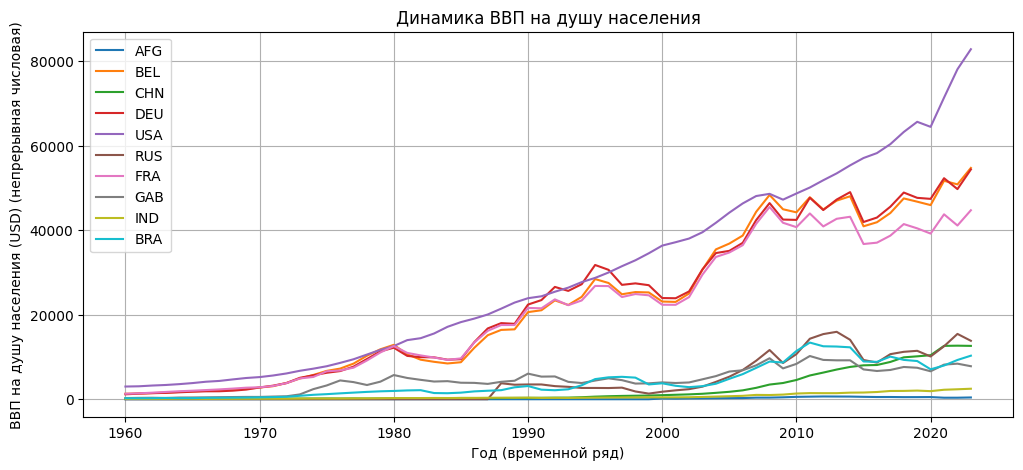

In [3]:
# Фильтрация данных для нескольких стран
countries = ['AFG', 'BEL', 'CHN', 'DEU', 'USA', 'RUS', 'FRA', 'GAB', 'IND', 'BRA']
df_filtered = df[df['country_code'].isin(countries)]

# График 1: Линейный график ВВП по годам (временной ряд)
plt.figure(figsize=(12, 5))
for country in countries:
    country_data = df_filtered[df_filtered['country_code'] == country]
    plt.plot(country_data['year'], country_data['gdp_per_capita'], label=country)

plt.title('Динамика ВВП на душу населения')
plt.xlabel('Год (временной ряд)')
plt.ylabel('ВВП на душу населения (USD) (непрерывная числовая)')
plt.legend()
plt.grid()
plt.show()

In [4]:
parameter = 'gdp_per_capita'
x_axis = 'year'
y_axis = 'gdp_variation'

val_min = np.floor(df[parameter].min() * 100) / 100
val_max = np.ceil(df[parameter].max() * 100) / 100


def update_scatter_plot(value_range):
    plt.figure(figsize=(12, 7))

    mask = (df[parameter] >= value_range[0]) & (df[parameter] <= value_range[1])
    filtered = df[mask]

    sc = plt.scatter(
        filtered[x_axis],
        filtered[y_axis],
        c=filtered[parameter],
        cmap='viridis',
        alpha=0.7
    )

    plt.colorbar(sc, label=parameter)
    plt.title(f'{x_axis} vs {y_axis} ({parameter}: {value_range[0]:.2f}-{value_range[1]:.2f})')
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.grid(True)
    plt.show()

interact(
    update_scatter_plot,
    value_range=FloatRangeSlider(
        min=val_min,
        max=val_max,
        step=0.01,
        value=(val_min, val_max),
        description='Диапазон:',
        continuous_update=False,
        readout_format='.2f'
    )
)

interactive(children=(FloatRangeSlider(value=(0.0, 133711.8), continuous_update=False, description='Диапазон:'…

<function __main__.update_scatter_plot(value_range)>

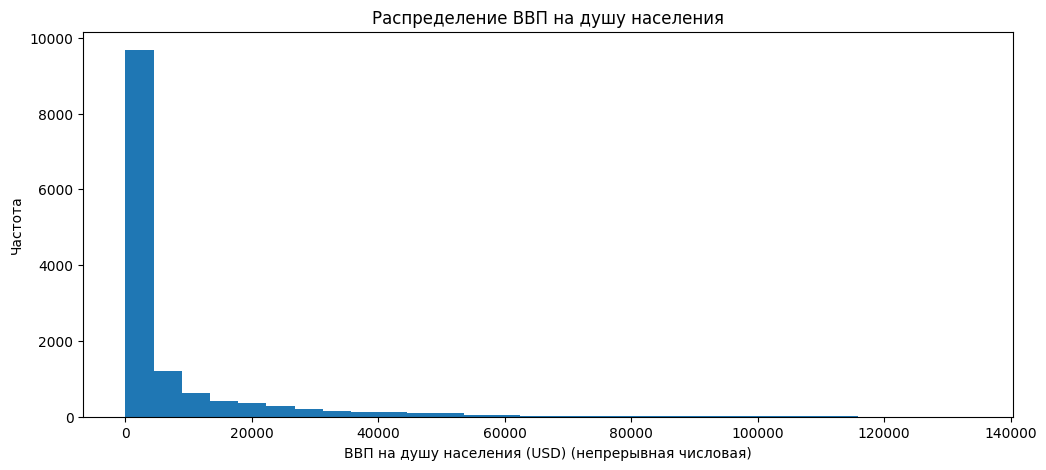

In [5]:
# График 2: Гистограмма распределения ВВП (анализ распределения)
plt.figure(figsize=(12, 5))
plt.hist(df['gdp_per_capita'].dropna(), bins=30)
plt.title('Распределение ВВП на душу населения')
plt.xlabel('ВВП на душу населения (USD) (непрерывная числовая)')
plt.ylabel('Частота')
plt.show()

pandas:
Построить три разных вида графиков с использованием pandas.DataFrame.plot / Series.plot.

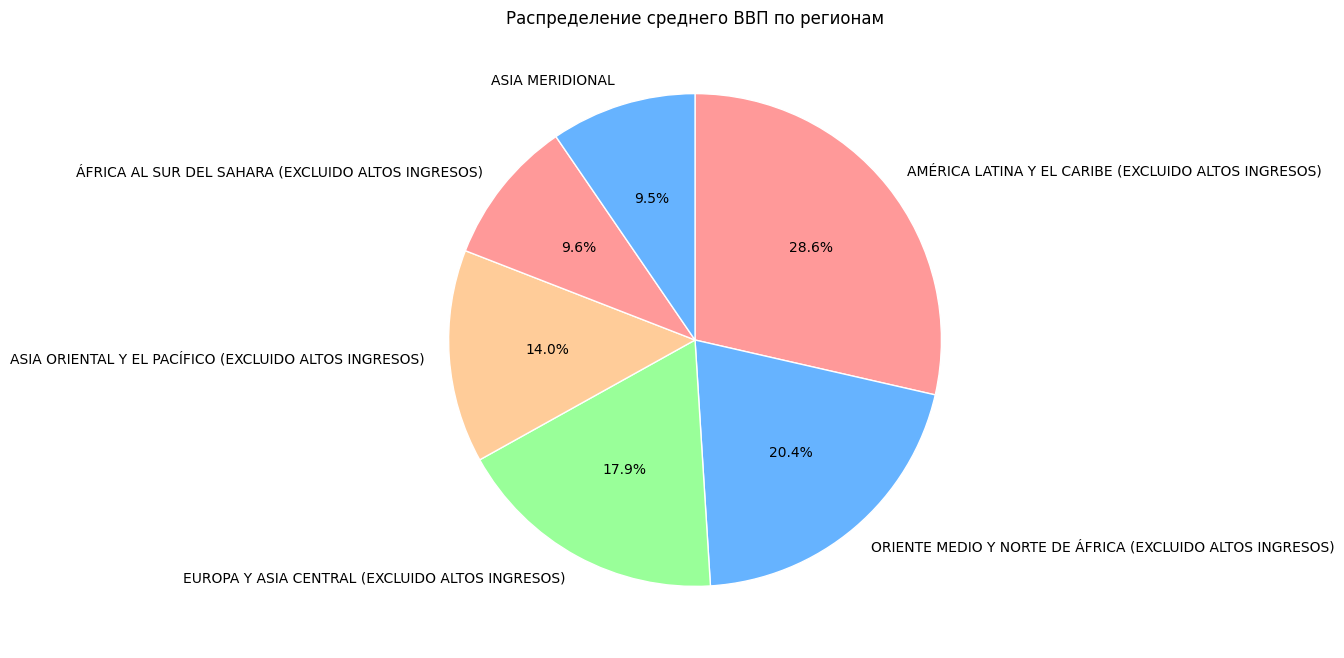

In [6]:
# График 1: Распределение среднего ВВП по регионам
region_data = df.groupby('region')['gdp_per_capita'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
region_data.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    colors=['#ff9999','#66b3ff','#99ff99','#ffcc99']
)
plt.title('Распределение среднего ВВП по регионам')
plt.ylabel('')
plt.show()

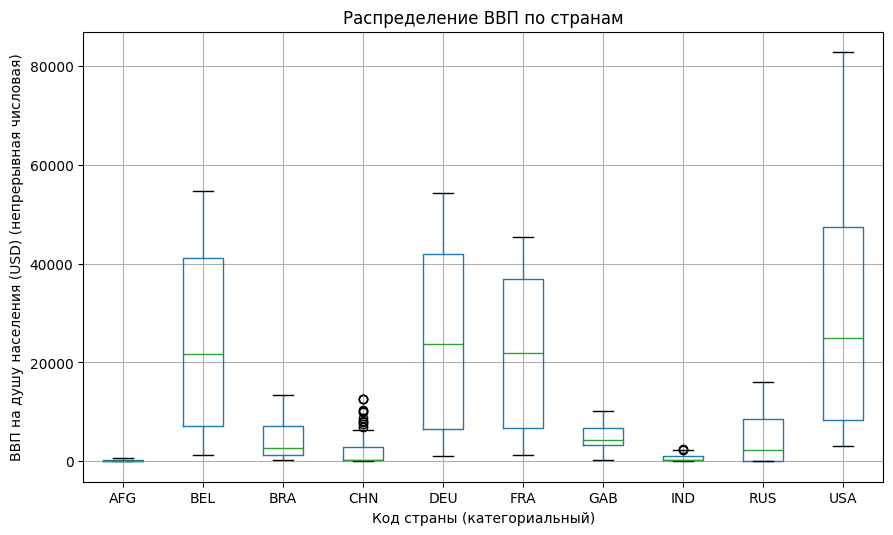

In [7]:
# График 2: Boxplot через Series распределение ВВП по странам
df_filtered.boxplot(column='gdp_per_capita', by='country_code', figsize=(10, 6))
plt.title('Распределение ВВП по странам')
plt.suptitle('')
plt.xlabel('Код страны (категориальный)')
plt.ylabel('ВВП на душу населения (USD) (непрерывная числовая)')
plt.show()

seaborn:

Построить .pairplot на каком-либо наборе данных, проанализировать взаимосвязь набора числовых признаков.

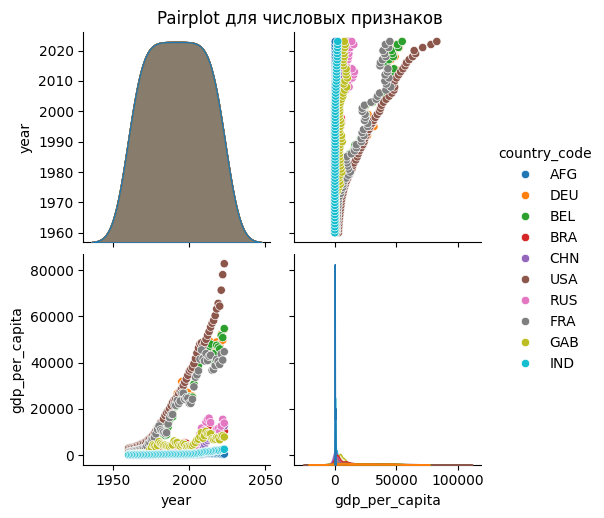

In [8]:
sns.pairplot(df_filtered[['year', 'gdp_per_capita', 'country_code']], hue='country_code')
plt.suptitle('Pairplot для числовых признаков', y=1.02)
plt.show()

Построить .jointplot, проанализировать взаимосвязь двух конкретных числовых признаков.

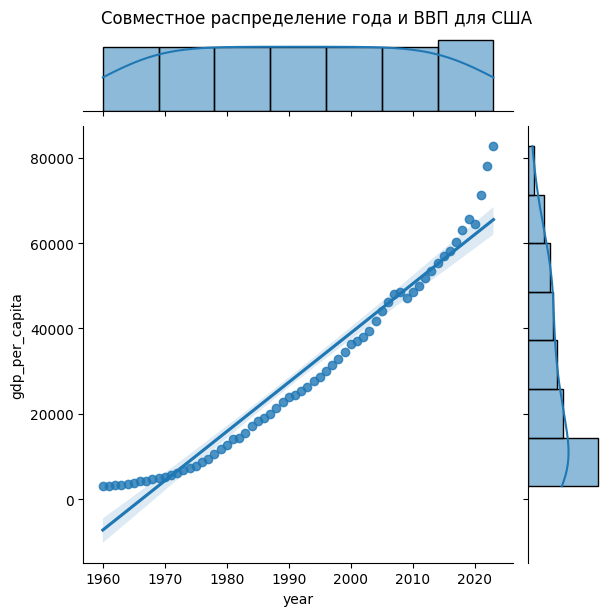

In [9]:
sns.jointplot(data=df[df['country_code'] == 'USA'],
              x='year', y='gdp_per_capita', kind='reg')
plt.suptitle('Совместное распределение года и ВВП для США', y=1.02)
plt.show()

Построить .boxplot и/или .violinplot на каком-либо наборе данных, проанализировать числовой признак в разрезе категориального.

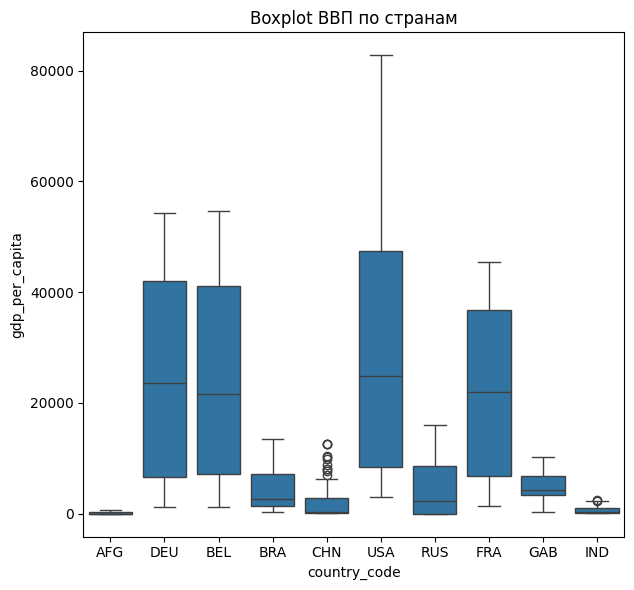

In [10]:
# Boxplot и Violinplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_filtered, x='country_code', y='gdp_per_capita')
plt.title('Boxplot ВВП по странам')

plt.tight_layout()
plt.show()

Построить график .heatmap попарной корреляции всех числовых признаков.

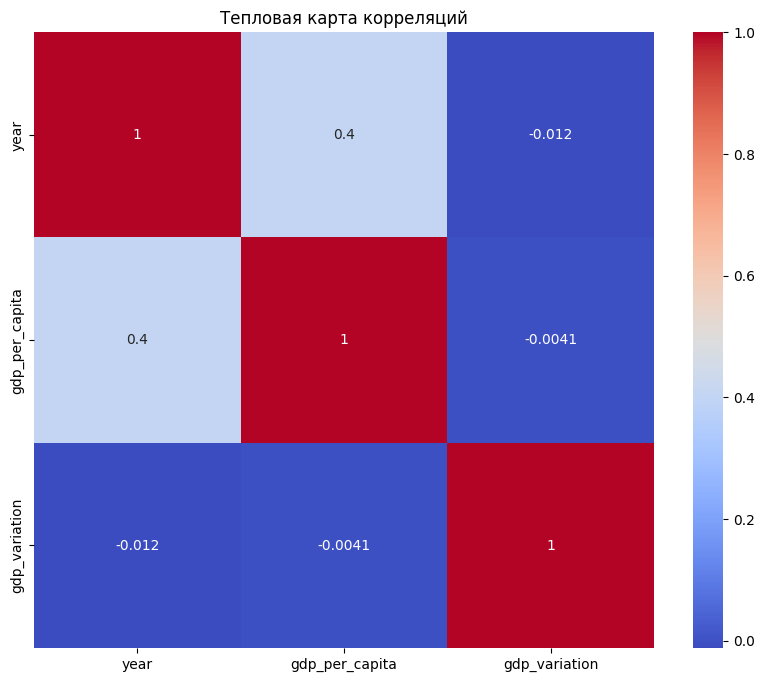

In [11]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Тепловая карта корреляций')
plt.show()

scipy.stats:

Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению.

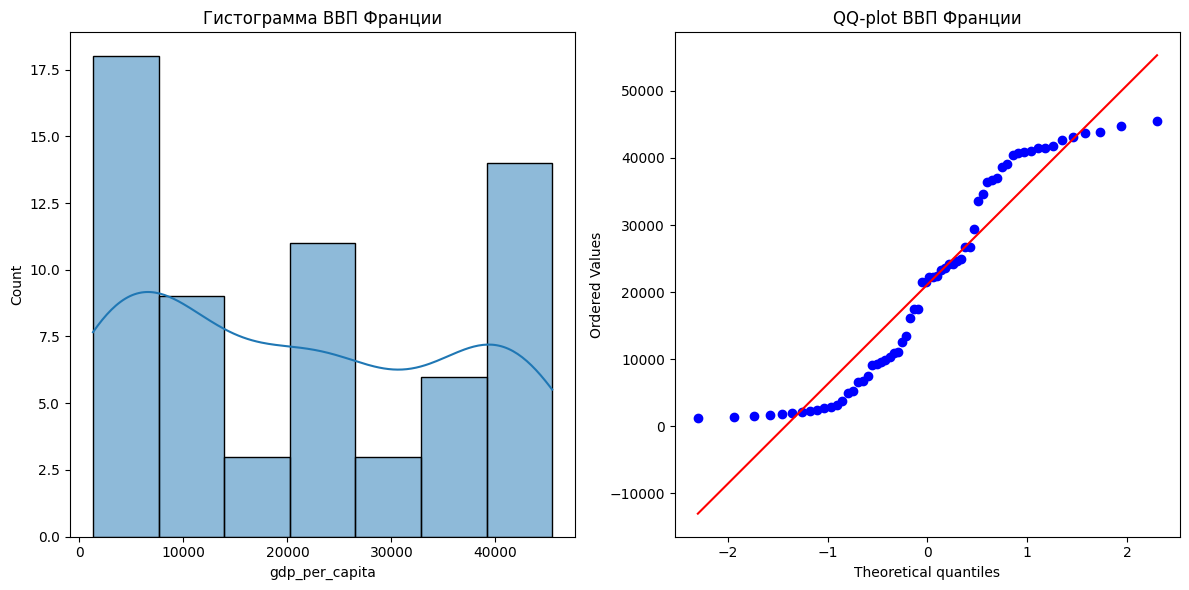

In [12]:
# Выбираем данные для анализа
data = df[df['country_code'] == 'FRA']['gdp_per_capita'].dropna()

# Гистограмма с нормальным распределением
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data, kde=True)
plt.title('Гистограмма ВВП Франции')

# QQ-plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('QQ-plot ВВП Франции')

plt.tight_layout()
plt.show()

plotly:

Построить несколько графиков разного вида.

In [13]:
fig = px.line(df_filtered, x='year', y='gdp_per_capita', color='country_code',
              title='Динамика ВВП на душу населения')
fig.show()

In [14]:
df_region_year = df.groupby(['year', 'sub_region'])['gdp_per_capita'].mean().reset_index()

fig = px.area(df_region_year,
              x='year',
              y='gdp_per_capita',
              color='sub_region',
              title='Динамика ВВП на душу населения по регионам',
              labels={'gdp_per_capita': 'Средний ВВП на душу населения (USD)'})
fig.show()

Построить несколько суб-графиков на одном графике.

In [15]:
# Создаем фигуру с суб-графиками
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=("Линейный график ВВП", "Столбчатая диаграмма", "Box plot по регионам"),
    specs=[[{"type": "xy"}, {"type": "xy"}, {"type": "xy"}]]
)

# 1. Линейный график (первый)
line_fig = px.line(df[df['gdp_per_capita'] > 0],
                   x='year', y='gdp_per_capita', color='country_code')
for trace in line_fig.data:
    fig.add_trace(trace, row=1, col=1)

# 2. Столбчатая диаграмма (второй)
last_year = df_filtered['year'].max()
df_last_year = df_filtered[(df_filtered['year'] == last_year) & (df_filtered['gdp_per_capita'] > 0)]
bar_fig = px.bar(df_last_year, x='country_code', y='gdp_per_capita')
for trace in bar_fig.data:
    fig.add_trace(trace, row=1, col=2)

# 3. Box plot (третий)
box_fig = px.box(df[df['gdp_per_capita'] > 0],
                 x='sub_region', y='gdp_per_capita')
for trace in box_fig.data:
    fig.add_trace(trace, row=1, col=3)

# Настраиваем макет
fig.update_layout(
    height=600,
    width=2000,
    title_text="Комплексный анализ ВВП на душу населения",
    showlegend=False
)

fig.show()

Построить интерактивный график.

In [16]:
# Создаём анимированный scatter-график
fig = px.scatter(
    df_filtered,
    x='year',
    y='gdp_per_capita',
    color='country_code',
    animation_frame='year',
    range_x=[df_filtered['year'].min(), df_filtered['year'].max()],
    range_y=[0, df_filtered['gdp_per_capita'].max()],
    title='Динамика ВВП по годам с траекториями'
)

# Добавляем линии для каждой страны
for country in df_filtered['country_code'].unique():
    df_country = df_filtered[df_filtered['country_code'] == country]
    fig.add_trace(
        go.Scatter(
            x=df_country['year'],
            y=df_country['gdp_per_capita'],
            mode='lines',  # линии вместо точек
            line=dict(color=px.colors.qualitative.Plotly[list(df_filtered['country_code'].unique()).index(country) % 10], width=1),
            name=country,
            showlegend=False  # чтобы не дублировать легенду
        )
    )

fig.show()

In [17]:
fig = px.choropleth(
    df,
    locations="country_code",
    color="gdp_per_capita",
    hover_name="country_name",
    animation_frame="year",
    range_color=[0, df['gdp_per_capita'].max()],
    title="Мировая карта ВВП на душу населения",
    color_continuous_scale=px.colors.sequential.Plasma
)

fig.update_layout(
    width=1000,
    height=600,
    margin=dict(l=0, r=0, t=50, b=0),
    geo=dict(
        showframe=False,
        projection_type='orthographic'
    )
)

fig.show()

In [18]:
# 1. Фильтруем данные последнего года и ненулевой ВВП
last_year = df['year'].max()
df_last_year = df[(df['year'] == last_year) & (df['gdp_per_capita'] > 0)]

# 2. Убедимся, что нет пропущенных значений в иерархических столбцах
df_last_year = df_last_year.dropna(subset=['region', 'sub_region', 'country_name'])

# 3. Приведем названия регионов к единому формату (пример для испанских названий)
df_last_year['region'] = df_last_year['region'].str.replace('AMÉRICA LATINA Y EL CARIBE \(EXCLUIDO ALTOS INGRESOS\)',
                                                          'LATIN AMERICA AND THE CARIBBEAN', regex=True)

# 4. Строим диаграмму
fig = px.sunburst(
    df_last_year,
    path=['region', 'sub_region', 'country_name'],
    values='gdp_per_capita',
    title=f'Иерархия ВВП на душу населения ({last_year} год)',
    color='gdp_per_capita',
    color_continuous_scale='RdBu'
)

fig.update_traces(textinfo="label+percent parent")
fig.show()